# Exploratory Data Analysis

Team Members: Sanjida Nisha, Nour Elabbasy, Cindy Weng Zhu

## Imports and Installs

In [ ]:
# Download Dataset
!gdown "https://drive.google.com/uc?id=1-gs7JstAfP1A0TdPEaaQYO2PN_qRlNXZ&export=download"

Downloading...
From: https://drive.google.com/uc?id=1-gs7JstAfP1A0TdPEaaQYO2PN_qRlNXZ&export=download
To: /content/Life_Expectancy_Data.csv
100% 333k/333k [00:00<00:00, 2.49MB/s]


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Description and Information

In [ ]:
# Load Dataset
raw_df = pd.read_csv("/content/Life_Expectancy_Data.csv")

In [ ]:
raw_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


To start with the exploratory data analysis, we should show the description of our data by using `describe()` method.

In [ ]:
raw_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


There are a total of 2938 data points. Some columms seem to have some missing values such as the `Alcohol`, `Hepatitis B` columns so those will be taken care of on the Data Cleaning section. No values seem to be too far out of expected ranges, there does not seem to be any negative values for any of the columns. The `Year` column has values that correspond to actual years as well as the `Population` column where the values match the expected range. 

We can also use `info` which prints the information about our dataset and its columns.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
raw_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
raw_df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

From this, we can see that we have two object type columns: Country and Status. When displaying their unique values, we can see that these columns are String based and that there are no null values or repeated names such as 'United States' and 'United States of America' that could be technically unique but contextually, they represent the same country. 

Since we only have two object type columns, we can use one-hot encoding in the data cleaning section so these columns can be more useful and expressive when training our model.

## Graphs and Charts

Next, we can visualize our data with graphs. First, we will graph the Status column to see how many countries in our data are Developed and Developing countries.

([<matplotlib.patches.Wedge at 0x7fe69feece10>,
 [Text(-0.939223082687329, 0.5725906050113911, '0'),
  Text(0.9392231362971265, -0.572590517074977, '1')],
 [Text(-0.5123034996476339, 0.3123221481880315, '82.6%'),
  Text(0.5123035288893416, -0.3123221002227147, '17.4%')])

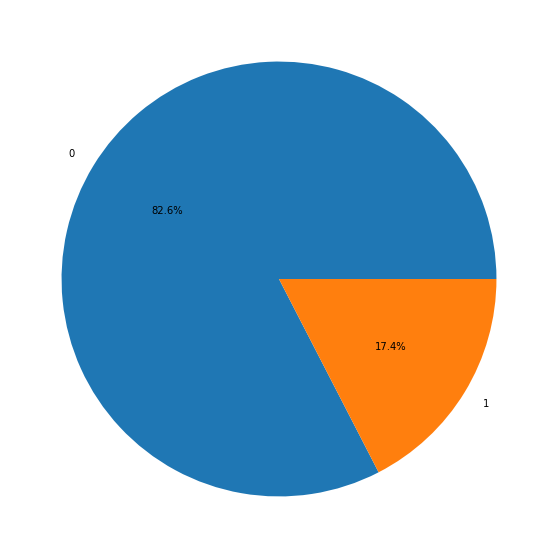

In [ ]:
# Graph pie chart of Status column
types = df['Status'].unique()
plt.figure(figsize=(15,10))
plt.pie(
    df['Status'].value_counts().to_list(),
    labels=types,
    autopct='%1.1f%%',
)

plt.show()

When inspecting the `Status` column, we can see that there are two unique values: Developed and Developing. Using a piechart as seen above, we can see that 82.6% of our data is composed of Developing countries while 17.4% of our data points are Developed countries. This means that, 17.4% of our data points are countries who "have an effective rate of industrialization and individual income"[1]. To know more about Developing vs Developed countries, we will attach this [article](https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf) by the United Nations about country's classifications.

Since the other string-based column in our dataset is the `Country` column which has 193 unique values, let's move on to graphing some of the numerical values in our dataset. We can find the average life expectancy of each year and visualize this:

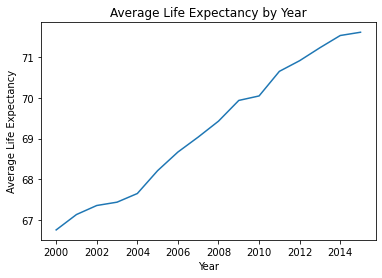

In [ ]:
# Graph Average Life Expectancy by year
plt.plot(raw_df.groupby('Year')['Year'].count().index, raw_df.groupby('Year')['Life expectancy '].mean())
plt.title('Average Life Expectancy by Year')
plt.ylabel('Average Life Expectancy')
plt.xlabel('Year')
plt.show()

From this graph, we can see that the average life expectancy from our dataset increases by the year from 2000 to 2015. This might be because we have better health conditions and our technology (for medical purposes) has developed so much since 2000 that it resulted in a higher life expectancy.

We can also use the average life expectancy against the `Status` column to observe the average life expectancy rate in developed vs developing countries.

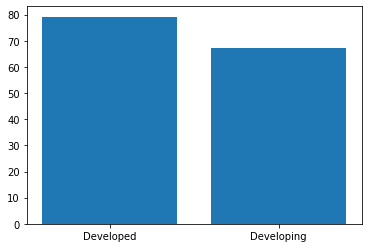

In [ ]:
# Graph average life expectancy vs Status
x_coords = np.arange(len(raw_df['Status'].unique()))
plt.bar(x_coords, raw_df.groupby('Status')['Life expectancy '].mean(), tick_label=('Developed', 'Developing'))
plt.title('Average Life Expectancy by Status')
plt.ylabel('Average Life Expectancy')
plt.show()

From this graph, we can see that the average life expectancy from our dataset is higher for developed countries than developing countries with a difference of almost 10%. This may be because developed countries have more access to resources and opportunities such as food, health care, education, shelter, etc for their population allowing them to have a higher life expectancy rate.

To further understand the relation between our columns and how some of them can help us with our data science question for the next part of our project, we can graph their correlation using Seaborn's Heatmap.

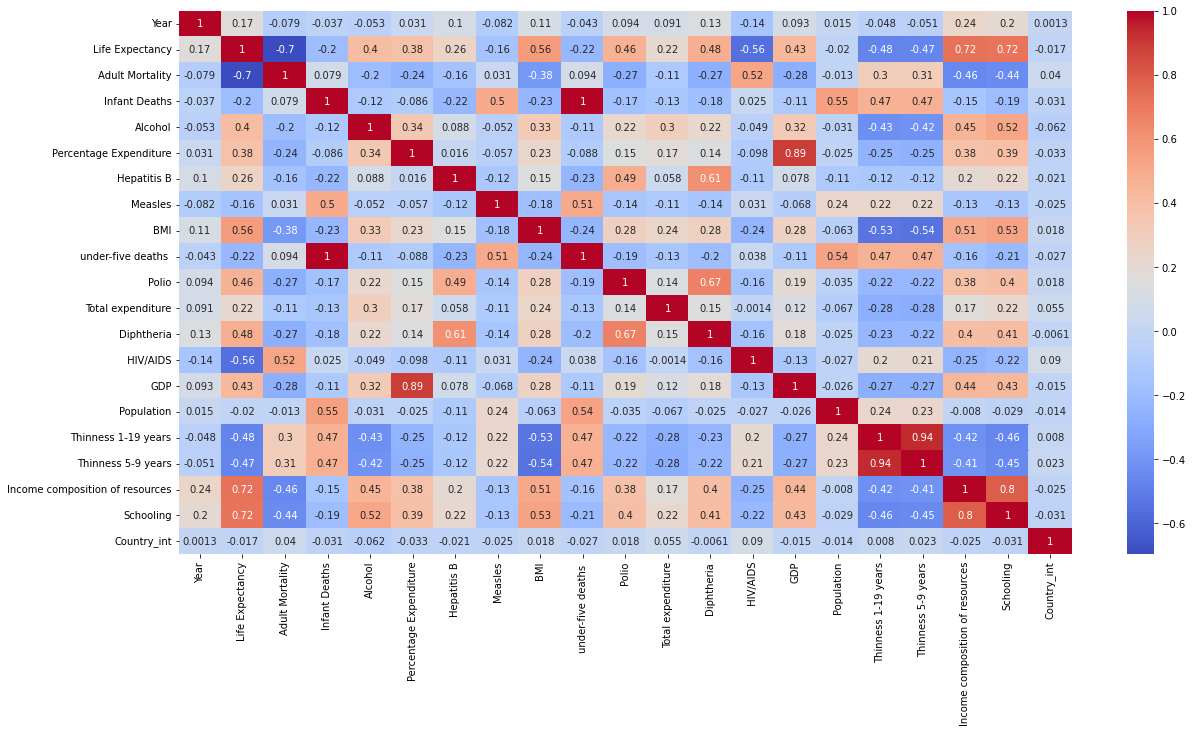

In [ ]:
# Correlation map
plt.figure(figsize=(20,10))
_ = sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

The values for the correlations between columns ranges from -1 to 1 where -1 represents a negative linear trend between the two variables, 0 no correlation, and 1 represents that there is a positive correlation between the two variables. 

Looking at the heatmap, we can ignore the diagonal 1's because they represent the correlation each column has with itself (which is a perfect correlation). Columns with high positive correlations are (above 0.8): 

* Income composition of resources vs. Schooling (0.8)
* Thinness 1-19 years vs. Thinness 5-9 years (0.94)
* Percentage Expenditure vs. GDP (0.9)
* Infant Deaths vs. Five-under Deaths (1)

The highest negative correlation is Adult Mortality vs. Life Expectancy (-0.7)

The reason why Infant Deaths vs. Five-under Deaths has a perfect correlation is because both of these columns represent the same thing, people aged five and under are considered infants. 

Furthermore, the column that we are trying to mainly focus on is `Life Expectancy` column, as we can see in the heatmap, the variables that have a high positive correlation with life expectancy are `Income composition of resources` and `Schooling`. This observation can suggest that countries who use their resources effectively and productively have a higher life expectancy. On a similar note, countries with higher number of people in school can increase life expectancy. The variable that has a high negative correlation with life expectancy is Adult Mortality. This can suggest that as adult mortality increases, life expectancy decreases in a country.

## References
1. S, Surbhi. “Difference Between Developed Countries and Developing Countries (with Comparison Chart).” Key Differences, 17 Apr. 2020, keydifferences.com/difference-between-developed-countries-and-developing-countries.html.